In [2]:
import matplotlib.pyplot as plt

from obspy.clients.fdsn.client import Client
from obspy import UTCDateTime
from obspy.core.event import Catalog
from obspy.core.stream import Stream
from obspy.core.event import Event
from obspy.core.event import Origin
from obspy.core.event import Magnitude
from obspy import read_events
from obspy import read_inventory
import cartopy.crs as ccrs

import pickle


In [3]:
catINGV=read_events('flegrei_2014_2023_INGV/catalogue_flegrei.xml')
catOV=read_events('flegrei_2014_2023_GOSSIP/catalogue_flegrei.xml')

In [10]:
str(catOV.events[0].resource_id).split('/')[1]

'36846841'

In [13]:
id_catalogues=[]

for ind,ev in enumerate(catINGV):
    
    origin_time = ev.origins[0].time
    time_min= 'time > ' + str(origin_time - 5)
    time_max= 'time < ' + str(origin_time + 5)
    cat= catOV.filter(time_min , time_max)

    id_catalogues.append([])
    id_catalogues[ind].append( int( str(ev.resource_id).split('=')[1] ) )

    for match in cat:
        id_catalogues[ind].append( int( str(match.resource_id).split('/')[1] ) )

id_catalogues

[[36846841, 31723],
 [36833201, 31717, 31718],
 [36794721, 31670],
 [36758731, 31666],
 [36755891, 31664],
 [36748281, 31646],
 [36701861, 31636],
 [36701841, 31633],
 [36697331, 31624],
 [36692381, 31619],
 [36624321, 31594],
 [36614161, 31592],
 [36613631, 31591],
 [36609981, 31587],
 [36605511, 31584],
 [36603661, 31583],
 [36565471, 31551],
 [36560281, 31549],
 [36559121, 31547],
 [36529181, 31501],
 [36520811, 31476],
 [36520801, 31575, 31475],
 [36521131, 31483],
 [36520991, 31481],
 [36520981, 31480],
 [36520771, 31477],
 [36520871, 31478],
 [36520821, 31474],
 [36520181, 31471],
 [36510951, 31459],
 [36499161, 31411],
 [36495931, 31390],
 [36493851, 31384],
 [36484541, 31374],
 [36463761, 31329],
 [36452601, 31277],
 [36450441, 31267],
 [36432371, 31219],
 [36432341, 31217],
 [36431911, 31215],
 [36420121, 31191],
 [36382041, 31003],
 [36381721, 30999],
 [36367171, 30945],
 [36366961, 30941],
 [36366571, 30925],
 [36365741, 30898],
 [36365471, 30897],
 [36361171, 30890],
 [3636

In [14]:
print( 'len INGV:', len(catINGV), 'len comparison:', len(id_catalogues) )

len INGV: 741 len comparison: 741


## save

In [15]:
with open("event_comparison_INGV_GOSSIP", "wb") as fp:   #Pickling
    pickle.dump(id_catalogues, fp)

## load

In [16]:
with open("event_comparison_INGV_GOSSIP", "rb") as fp:   # Unpickling
    catalogues = pickle.load(fp)

In [17]:
catalogues[0:6]

[[36846841, 31723],
 [36833201, 31717, 31718],
 [36794721, 31670],
 [36758731, 31666],
 [36755891, 31664],
 [36748281, 31646]]

In [18]:
ev_not_found=[]
ev_multiple_det=[]

for ev in catalogues:
    if len(ev)   >= 3:
        ev_multiple_det.append(ev)
    elif len(ev) == 1:
        ev_not_found.append(ev)
    elif len(ev) != 2:
        print('!event not categorized!')
        

In [19]:
ev_multiple_det

[[36833201, 31717, 31718],
 [36520801, 31575, 31475],
 [36361161, 31275, 30889],
 [36308421, 30569, 31095],
 [36284971, 30962, 30396],
 [35901131, 29517, 29048],
 [35882751, 29560, 29004],
 [35872541, 29652, 28923],
 [35827991, 28675, 29246],
 [35736521, 29420, 28455],
 [35317431, 26357, 26356],
 [35317131, 26297, 26290],
 [35009791, 25518, 25519],
 [34689631, 24645, 24688],
 [34172651, 23551, 23542],
 [33547701, 17821, 17747],
 [32238931, 16415, 16472],
 [28881041, 13052, 6090],
 [26823581, 5280, 13688],
 [25916061, 14581, 4496],
 [25827491, 4350, 4395],
 [25817161, 4350, 4395],
 [25494111, 3876, 11987],
 [22029011, 1345, 1344],
 [19726281, 10027, 10026, 381]]

In [20]:
ev_not_found

[[36347421],
 [36318421],
 [35119061],
 [33686281],
 [27435061],
 [24523531],
 [24415911],
 [22438881],
 [6925231],
 [6783751],
 [6301551]]

In [36]:
[ev for ev in catOV if ev.resource_id.id.split('/')[1]== str(catalogues[0][1]) ]

[Event:	2023-11-11T19:15:55.940000Z | +40.833,  +14.132 | 1.3  D 

	 resource_id: ResourceIdentifier(id="smi:local/31723")
	        ---------
	    comments: 1 Elements
	     origins: 1 Elements
	  magnitudes: 1 Elements]

In [37]:
for ev in catOV:
    if  ev.resource_id.id.split('/')[1]== str(catalogues[0][1]):
        ev1=ev
ev1

Event:	2023-11-11T19:15:55.940000Z | +40.833,  +14.132 | 1.3  D 

	 resource_id: ResourceIdentifier(id="smi:local/31723")
	        ---------
	    comments: 1 Elements
	     origins: 1 Elements
	  magnitudes: 1 Elements

# Stations

In [23]:
client=Client('INGV')

stime=UTCDateTime('2014-01-01T00:00:00')
etime=UTCDateTime('2023-11-20T00:00:00')

In [40]:
lat=40.8478
long=14.0918
rad_events=0.5
inv=client.get_stations(starttime=stime,endtime=etime,
                        latitude=lat,longitude=long,maxradius=rad_events,
                        level='response')                                   #instrumental response
inv

Inventory created at 2023-11-30T15:19:58.273000Z
	Created by: INGV-ONT WEB SERVICE: fdsnws-station | version: 1.1.57
		    /exist/apps/fdsn-station/fdsnws/station/1/query?starttime=2014-01-0...
	Sending institution: eXistDB (INGV-ONT)
	Contains:
		Networks (3):
			IV, IX, ZM
		Stations (49):
			IV.CAAM (Accademia Aeronautica Pozzuoli)
			IV.CAFL (Arco Felice)
			IV.CAWE (Astroni Ovest - Stazione Osservatorio Vesuviano)
			IV.CBAC (Campi Flegrei, Castello di Baia - Stazione Osservatorio Vesu)
			IV.CCAP (Capo Posillipo C. acqisiz. - Stazione Osservatorio Vesuviano)
			IV.CFMN (Monte Nuovo)
			IV.CMIS (Faro di Capo Miseno - Stazione Osservatorio Vesuviano)
			IV.CMSN (Monte S.Angelo)
			IV.CMTS (Campi Flegrei, Via Metastasio CNR-IRC)
			IV.CNIS (Campi Flegrei - Isola di Nisida)
			IV.COLB (Campi Flegrei, Galleria Monte Olibano, Stazione Osservatorio)
			IV.CPIS (Campi Flegrei - Fumarola Pisciarelli)
			IV.CPOZ (Darsena Pozzuoli - Stazione Osservatorio Vesuviano)
			IV.CQUE (Campi Flegrei

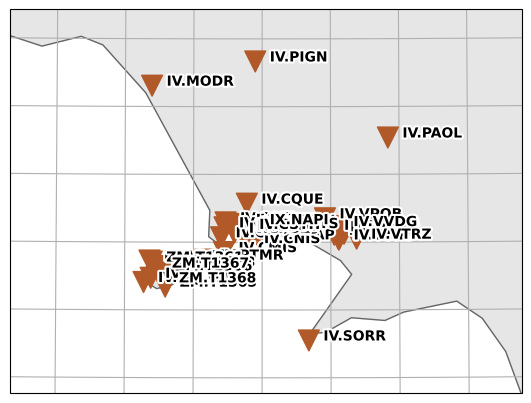

In [41]:
inv.plot(projection='local',resolution='h');

In [42]:
inv.write('flegrei_2014_2023_INGV/inventory_flegrei.xml',format='STATIONXML')                        #save

In [44]:
inv_f=read_inventory('flegrei_2014_2023_INGV/inventory_flegrei.xml')                                 #read

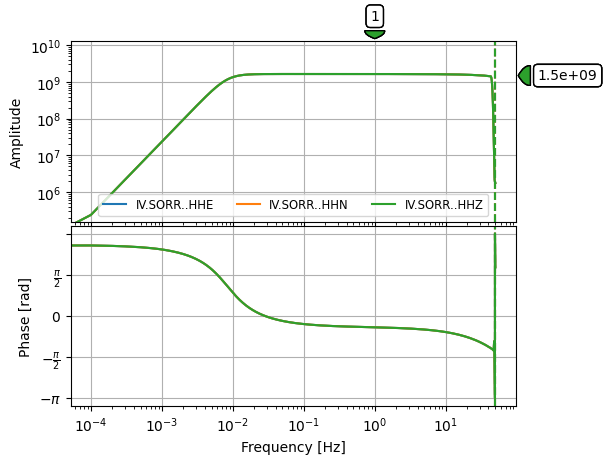

In [45]:
inv_f.plot_response(min_freq=1E-4,station='SORR',channel='[EH]H?');

# Waveform 

In [5]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime, Stream
from obspy import read, read_inventory
from obspy.core import AttribDict
from obspy.core.event import Pick, WaveformStreamID, Arrival, Amplitude
from obspy.core.event import Event, Origin, Magnitude
from obspy.core.event import EventDescription, CreationInfo
from obspy import read
import obspy
import os
#import geopy.distance

#### Define the client
client = Client("INGV")

# Questo è il tempo origine del terrmoto, derivato dal catalogo
torig=UTCDateTime(2023,9,22,9,2,0)
t1=torig-60         # taglia le tracce 60s prima del tempo origine
t2=torig+120        # taglia le tracce 60s dopo il tempo origine


### define pre-filtering for instr. correction
pre_filt = [0.01, 0.1, 25,30]

pnet='IV'
psta='CMIS'
wildcmp='HH*' #HH Broad Band, for moment tensor inversion
outdir="./waveform/"

# Get the waveforms from t1 to t2  
st = client.get_waveforms(network=pnet, station=psta, location='*',
                          channel=wildcmp,starttime=t1,endtime=t2)
                    
# merge the traces, in case there are holes
st.merge(fill_value=0)
# trim over the [t1, t2] interval
st.trim(starttime=t1, endtime=t2, pad=True, fill_value=0)
# remove trend
st.detrend("demean")
                                    
# Get the instrument characteristics
rinv=client.get_stations(network=pnet,station=psta,
                         channel=wildcmp,level='response')

# 
st.remove_response(inventory=rinv, output='DISP', pre_filt=pre_filt)

st.write(outdir+'test.mseed',format='MSEED')

/Users/user/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


In [99]:
evID = str(ev_multiple_det[0][2])

for ev in catOV :
    if ev.resource_id.id.split('/')[1]== evID:
        origin_time=ev.origins[0].time

event_start=origin_time
event_end=origin_time +30
print('event occurred:',event_start)

wave=Stream()
for network in inv_f:
    for  station in network.stations:
        try:
            wave += client.get_waveforms(starttime=event_start,endtime=event_end,
                                network=network.code,station=station.code,location='*', channel='HH?',
                                attach_response=True,)
        except:
            print(station.code , 'station not found')

print('traces found:',len(wave.traces))

wave.merge(fill_value=0)
# trim over the [t1, t2] interval
wave.trim(starttime=event_start, endtime=event_end, pad=True, fill_value=0)
# remove trend
wave.detrend("demean")
#remove instrumental response
pre_filt = [0.01, 0.1, 25,30]
wave.remove_response(inventory=inv_f, output='DISP', pre_filt=pre_filt) #output=VEL ??

wave.write('waveform/wave_'+ evID +'.mseed',format='MSEED')

event occurred: 2023-11-10T17:51:58.279000Z
CAFL station not found
CAWE station not found
CCAP station not found
CMTS station not found
CPIS station not found
IBCM station not found
ICVJ station not found
IMTC station not found
IPSM station not found
IVLC station not found
MODR station not found
VARP station not found
VPOB station not found
VTRZ station not found
VVDG station not found
NAPI station not found
T1361 station not found
T1363 station not found
T1365 station not found
T1366 station not found
T1367 station not found
T1368 station not found
traces found: 81


/Users/user/Library/Python/3.9/lib/python/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
